In [1]:
import shutil

def copy_directory(src_dir, dst_dir):
    try:
        shutil.copytree(src_dir, dst_dir)
        print(f"Direktori {src_dir} berhasil disalin ke {dst_dir}.")
    except shutil.Error as e:
        print(f"Kesalahan saat menyalin direktori: {e}")
    except OSError as e:
        print(f"Kesalahan sistem: {e}")


src_directory = '/kaggle/input/cocoa-disease-v3/cocoa_diseases/'
dst_directory = '/kaggle/working/cocoa_diseases'

copy_directory(src_directory, dst_directory)

Direktori /kaggle/input/cocoa-disease-v3/cocoa_diseases/ berhasil disalin ke /kaggle/working/cocoa_diseases.


In [2]:
import os
# Menghitung jumlah item dalam folder
folder_path = '/kaggle/working/cocoa_diseases/pod_borer'
item = os.listdir(folder_path)
count = len(item)

print(f"Jumlah isi dalam folder: {count}")

Jumlah isi dalam folder: 104


In [3]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    """
    Splits the data into train and test sets
    
    Args:
      SOURCE_DIR (string): directory path containing the images
      TRAINING_DIR (string): directory path to be used for training
      VALIDATION_DIR (string): directory path to be used for validation
      SPLIT_SIZE (float): proportion of the dataset to be used for training
      
    Returns:
      None
    """
    if not os.path.exists(TRAINING_DIR):
          os.makedirs(TRAINING_DIR)
    if not os.path.exists(VALIDATION_DIR):
          os.makedirs(VALIDATION_DIR)


    if len(os.listdir(TRAINING_DIR)) > 0:
      for file in os.scandir(TRAINING_DIR):
        os.remove(file.path)

    if len(os.listdir(VALIDATION_DIR)) > 0:
      for file in os.scandir(VALIDATION_DIR):
        os.remove(file.path)
   
    # pass
          # Loop through the source directory and get the list of all files
    file_list = os.listdir(SOURCE_DIR)
    
    # Shuffle the file list randomly
    random.shuffle(file_list)
    
    # Calculate the split index for training and validation sets
    split_index = int(SPLIT_SIZE * len(file_list))
    
    # Split the files into training and validation sets
    train_files = file_list[:split_index]
    val_files = file_list[split_index:]
    
    # Copy the training files to the training directory
    for file in train_files:
        src_path = os.path.join(SOURCE_DIR, file)
        dst_path = os.path.join(TRAINING_DIR, file)
        # Check if the file has non-zero length before copying
        if os.path.getsize(src_path) > 0:
            shutil.copyfile(src_path, dst_path)
        else:
            print(f"{file} is zero length, so ignoring.")
    
    # Copy the validation files to the validation directory
    for file in val_files:
        src_path = os.path.join(SOURCE_DIR, file)
        dst_path = os.path.join(VALIDATION_DIR, file)
        # Check if the file has non-zero length before copying
        if os.path.getsize(src_path) > 0:
            shutil.copyfile(src_path, dst_path)
        else:
            print(f"{file} is zero length, so ignoring.")

  

In [5]:
# Define paths
black_pod_rot_SRC_DIR = "/kaggle/working/cocoa_diseases/black_pod_rot"
pod_borer_SRC_DIR = "/kaggle/working/cocoa_diseases/pod_borer"
healthy_SRC_DIR = "/kaggle/working/cocoa_diseases/healthy"


TRAINING_DIR = "/kaggle/working/training"
VALIDATION_DIR = "/kaggle/working/validation"


TRAINING_BPR_DIR = os.path.join(TRAINING_DIR, "black_pod_rot/")
VALIDATION_BPR_DIR = os.path.join(VALIDATION_DIR, "black_pod_rot/")

TRAINING_PB_DIR = os.path.join(TRAINING_DIR, "pod_borer/")
VALIDATION_PB_DIR = os.path.join(VALIDATION_DIR, "pod_borer/")

TRAINING_HEALTHY_DIR = os.path.join(TRAINING_DIR, "healthy/")
VALIDATION_HEALTHY_DIR = os.path.join(VALIDATION_DIR, "healthy/")

# create directory

if not os.path.exists(TRAINING_DIR):
  os.makedirs(TRAINING_DIR)
if not os.path.exists(VALIDATION_DIR):
  os.makedirs(VALIDATION_DIR)


# Empty directories in case you run this cell multiple times

# if len(os.listdir(TRAINING_BPR_DIR)) > 0:
#   for file in os.scandir(TRAINING_BPR_DIR):
#     os.remove(file.path)

# if len(os.listdir(VALIDATION_BPR_DIR)) > 0:
#   for file in os.scandir(VALIDATION_BPR_DIR):
#     os.remove(file.path)

# if len(os.listdir(TRAINING_PB_DIR)) > 0:
#   for file in os.scandir(TRAINING_PB_DIR):
#     os.remove(file.path)

# if len(os.listdir(VALIDATION_PB_DIR)) > 0:
#   for file in os.scandir(VALIDATION_PB_DIR):
#     os.remove(file.path)

# if len(os.listdir(TRAINING_HEALTHY_DIR)) > 0:
#   for file in os.scandir(TRAINING_HEALTHY_DIR):
#     os.remove(file.path)

# if len(os.listdir(VALIDATION_HEALTHY_DIR)) > 0:
#   for file in os.scandir(VALIDATION_HEALTHY_DIR):
#     os.remove(file.path)



# Define proportion of images used for training
split_size = .8


split_data(black_pod_rot_SRC_DIR, TRAINING_BPR_DIR, VALIDATION_BPR_DIR, split_size)
split_data(pod_borer_SRC_DIR, TRAINING_PB_DIR, VALIDATION_PB_DIR, split_size)
split_data(healthy_SRC_DIR, TRAINING_HEALTHY_DIR, VALIDATION_HEALTHY_DIR, split_size)





In [6]:

print(f"\n\nOriginal Black Pod Rot directory has {len(os.listdir(black_pod_rot_SRC_DIR))} images")
print(f"Original Pod Borer directory has {len(os.listdir(pod_borer_SRC_DIR))} images")
print(f"Original Healthy directory has {len(os.listdir(healthy_SRC_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_BPR_DIR))} images of Black Pod Rot for training")
print(f"There are {len(os.listdir(TRAINING_PB_DIR))} images of Pod Borer for training")
print(f"There are {len(os.listdir(TRAINING_HEALTHY_DIR))} images ofHealthy for training\n")

print(f"There are {len(os.listdir(VALIDATION_BPR_DIR))} images of Black Pod Rot for validation")
print(f"There are {len(os.listdir(VALIDATION_PB_DIR))} images of Pod Borer for validation")
print(f"There are {len(os.listdir(VALIDATION_HEALTHY_DIR))} images of Healthy for validation")



Original Black Pod Rot directory has 497 images
Original Pod Borer directory has 104 images
Original Healthy directory has 497 images

There are 397 images of Black Pod Rot for training
There are 83 images of Pod Borer for training
There are 397 images ofHealthy for training

There are 100 images of Black Pod Rot for validation
There are 21 images of Pod Borer for validation
There are 100 images of Healthy for validation


In [7]:

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """


  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(
                                    rescale=1. / 255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
                                     )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode='categorical',
                                                      target_size=(250,250))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=20,
                                                                class_mode='categorical',
                                                                target_size=(250,250))
 
  return train_generator, validation_generator

In [8]:

train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 877 images belonging to 3 classes.
Found 221 images belonging to 3 classes.


In [9]:

def create_model():

  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(250,250,3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(), 
    #tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(100, activation='relu'), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(3, activation='softmax')  
  ])

  from tensorflow.keras.optimizers import Adam
  model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 


  return model

In [10]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 246, 246, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 123, 123, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 123, 123, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 119, 119, 64)      36928     
                                                        

In [11]:
#Train
history = model.fit(train_generator,
                    epochs=30,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/30
44/44 [==============================] - 215s 5s/step - loss: 1.0172 - accuracy: 0.4538 - val_loss: 0.9413 - val_accuracy: 0.4525
Epoch 2/30
44/44 [==============================] - 213s 5s/step - loss: 0.9048 - accuracy: 0.4960 - val_loss: 0.9709 - val_accuracy: 0.5566
Epoch 3/30
44/44 [==============================] - 212s 5s/step - loss: 0.8469 - accuracy: 0.5644 - val_loss: 0.8488 - val_accuracy: 0.6652
Epoch 4/30
44/44 [==============================] - 215s 5s/step - loss: 0.7944 - accuracy: 0.6135 - val_loss: 0.7795 - val_accuracy: 0.6697
Epoch 5/30
44/44 [==============================] - 215s 5s/step - loss: 0.7741 - accuracy: 0.6465 - val_loss: 0.7530 - val_accuracy: 0.6697
Epoch 6/30
44/44 [==============================] - 217s 5s/step - loss: 0.7641 - accuracy: 0.6397 - val_loss: 0.7794 - val_accuracy: 0.6878
Epoch 7/30
44/44 [==============================] - 223s 5s/step - loss: 0.7467 - accuracy: 0.6659 - val_loss: 0.7174 - val_accuracy: 0.6697
Epoch 8/30
44

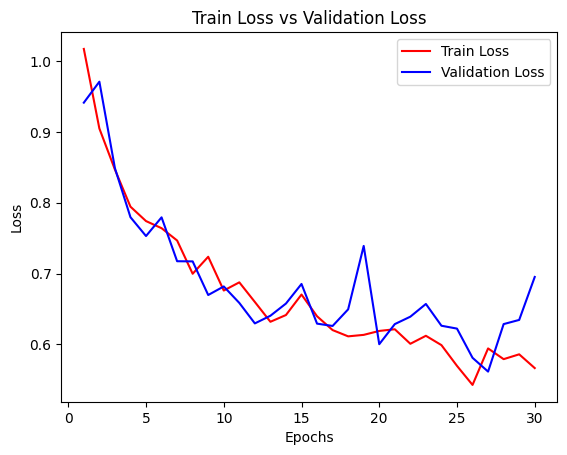

In [12]:

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot train loss dan validation loss
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

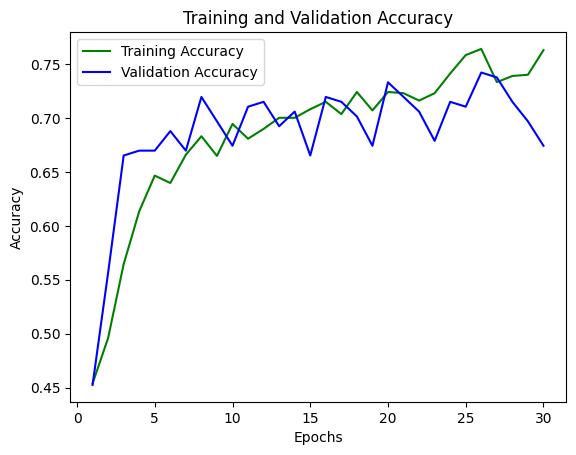

In [14]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:

from tensorflow.keras.preprocessing import image
import numpy as np


# Fungsi untuk melakukan prediksi pada file gambar
def predict_image(file):
    img = image.load_img(file, target_size=(250, 250))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    prediction = model.predict(img)
    predicted_class_index = np.argmax(prediction)
    
    return predicted_class_index

#file
uploaded_file = '/kaggle/input/test-data/test cocoa/pod_borer/pod_borer_63.jpg'

#prediksi pada file gambar
predicted_class_index = predict_image(uploaded_file)


print("Hasil prediksi:", predicted_class_index)


1/1 [==============================] - 0s 115ms/step
Hasil prediksi: 2
